In [ ]:
!pip install sentence-transformers gudhi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 15.7 MB/s eta 0:00:00


# **Wasserstein distance of text pairs**

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from gudhi import RipsComplex
from gudhi.wasserstein import wasserstein_distance
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# 1. Load a pre-trained sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can replace with a larger model

# 2. Example text pairs
text_pairs = [
    ("The quick brown fox jumps over the lazy dog.", "A swift auburn fox leaps above a sleepy canine."),
    ("Apples and oranges are fruits.", "The Eiffel Tower is in Paris."),
]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
def compute_0d_persistence_diagram(embedding):
    """
    Compute the 0-dimensional persistence diagram from a high-dimensional vector.
    """
    # Transform the embedding into a 2D array of 1D points
    point_cloud = np.expand_dims(embedding, axis=1)  # shape (dim, 1)
    rips_complex = RipsComplex(points=point_cloud)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    diag = simplex_tree.persistence(homology_coeff_field=2, persistence_dim_max=True)
    # Filter for H0 only (0-dim features)
    return [pt for pt in diag if pt[0] == 0]

def diagram_to_array(diagram):
    """
    Convert persistence diagram into an array of birth-death pairs.
    """
    return np.array([pair[1] for pair in diagram])


In [ ]:
for idx, (text1, text2) in enumerate(text_pairs):
    print(f"\n--- Pair {idx+1} ---")
    print("Text 1:", text1)
    print("Text 2:", text2)

    # 3. Generate sentence embeddings
    emb1 = model.encode(text1)
    emb2 = model.encode(text2)

    # 4. Compute 0-D persistence diagrams
    diag1 = compute_0d_persistence_diagram(emb1)
    diag2 = compute_0d_persistence_diagram(emb2)

    # Convert diagrams to birth-death arrays
    arr1 = diagram_to_array(diag1)
    arr2 = diagram_to_array(diag2)

    # 5. Compute distances
    emb_distance = euclidean_distances([emb1], [emb2])[0][0]
    topo_distance = wasserstein_distance(arr1, arr2, order=1., internal_p=2.)

    print(f"Embedding Distance (Euclidean): {emb_distance:.4f}")
    print(f"Topological Distance (Wasserstein on H0): {topo_distance:.4f}")



--- Pair 1 ---
Text 1: The quick brown fox jumps over the lazy dog.
Text 2: A swift auburn fox leaps above a sleepy canine.
Embedding Distance (Euclidean): 0.7692
Topological Distance (Wasserstein on H0): 0.0322

--- Pair 2 ---
Text 1: Apples and oranges are fruits.
Text 2: The Eiffel Tower is in Paris.
Embedding Distance (Euclidean): 1.4753
Topological Distance (Wasserstein on H0): 0.0674


# **Topological distance of Persistent diagrams**

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from gudhi import RipsComplex
from gudhi.wasserstein import wasserstein_distance
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
multi_model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')
mono_model = SentenceTransformer('sentence-transformers/msmarco-roberta-base-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/709 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Load sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2')


def compute_0d_persistence_diagram(embedding):
    """
    Compute the 0-dimensional persistence diagram from a high-dimensional vector.
    """
    point_cloud = np.expand_dims(embedding, axis=1)  # Shape: (dim, 1)
    rips_complex = RipsComplex(points=point_cloud)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    diag = simplex_tree.persistence(homology_coeff_field=2, persistence_dim_max=True)
    return [pt for pt in diag if pt[0] == 0]  # Keep only H0 features

def diagram_to_array(diagram):
    """
    Convert persistence diagram into array of (birth, death) pairs.
    """
    return np.array([pair[1] for pair in diagram])

def wasserstein_distance_from_embeddings(emb1, emb2, order=1., internal_p=2.):
    """
    Compute Wasserstein distance between 0-d persistence diagrams
    of two sentence embeddings.
    """
    diag1 = compute_0d_persistence_diagram(emb1)
    diag2 = compute_0d_persistence_diagram(emb2)

    arr1 = diagram_to_array(diag1)
    arr2 = diagram_to_array(diag2)

    return wasserstein_distance(arr1, arr2, order=order, internal_p=internal_p)

In [ ]:
from sklearn.preprocessing import normalize

def normalize_embedding(embedding):
    """Normalize a single embedding to unit length (L2 norm = 1)."""
    return normalize(embedding.reshape(1, -1))[0]

In [ ]:
import pandas as pd

df = pd.read_parquet("hf://datasets/aircrypto/English-French-Translations/data/train-00000-of-00001.parquet")

In [ ]:
df.head()

,label,english,french
0,1,"The film stars M. G. Ramachandran, Latha, Anja...","Le film met en vedette M. G. Ramachandran, Lat..."
1,1,Naarda plenirena is a species of moth in the f...,La Naarda plenirena est une espèce de papillon...
2,1,Sponsored by the American Federation of Labor ...,Soutenue par la Fédération américaine du trava...
3,1,Since that election the Belfast Corporation Ac...,"Depuis cette élection, la loi sur la corporati..."
4,1,It was also included on their Best of Volume 1.,Il a également été inclus dans leur Best of Vo...


In [ ]:
len(df)

1000

In [ ]:
from tqdm import tqdm

In [ ]:
# Example text pairs
text_pairs = [
    ("The quick brown fox jumps over the lazy dog.", "A swift auburn fox leaps above a sleepy canine."),
    ("Apples and oranges are fruits.", "The Eiffel Tower is in Paris."),
]

for idx, (text1, text2) in enumerate(text_pairs):
    print(f"\n--- Pair {idx+1} ---")
    print("Text 1:", text1)
    print("Text 2:", text2)

    # Get embeddings
    emb1 = multi_model.encode(text1)
    emb2 = mono_model.encode(text2)

    # Compare distances
    emb_distance = euclidean_distances([emb1], [emb2])[0][0]
    topo_distance = wasserstein_distance_from_embeddings(emb1, emb2)

    print(f"Embedding Distance (Euclidean): {emb_distance:.4f}")
    print(f"Topological Distance (Wasserstein on H0): {topo_distance:.4f}")


--- Pair 1 ---
Text 1: The quick brown fox jumps over the lazy dog.
Text 2: A swift auburn fox leaps above a sleepy canine.
Embedding Distance (Euclidean): 0.7692
Topological Distance (Wasserstein on H0): 0.0322

--- Pair 2 ---
Text 1: Apples and oranges are fruits.
Text 2: The Eiffel Tower is in Paris.
Embedding Distance (Euclidean): 1.4753
Topological Distance (Wasserstein on H0): 0.0674


In [ ]:
def get_distance(text1, text2):
  euc_dist = []
  topo_dist = []

  for i in tqdm(range(len(text1))):

    emb1 = normalize_embedding(multi_model.encode(text1[i]))
    emb2 = normalize_embedding(mono_model.encode(text2[i]))

    # Compare distances
    emb_distance = euclidean_distances([emb1], [emb2])[0][0]
    topo_distance = wasserstein_distance_from_embeddings(emb1, emb2)

    euc_dist.append(emb_distance)
    topo_dist.append(topo_distance)

  return pd.DataFrame({"text1": text1, "text2": text2,
                       "euc_dist": euc_dist, "topo_dist": topo_dist})


In [ ]:
all_dist = get_distance(df["english"][0:500], df["french"][0:500])

100%|██████████| 500/500 [17:51<00:00,  2.14s/it]


In [ ]:
all_dist.head()

,text1,text2,euc_dist,topo_dist
0,"The film stars M. G. Ramachandran, Latha, Anja...","Le film met en vedette M. G. Ramachandran, Lat...",1.416310,0.047506
1,Naarda plenirena is a species of moth in the f...,La Naarda plenirena est une espèce de papillon...,1.431915,0.071278
2,Sponsored by the American Federation of Labor ...,Soutenue par la Fédération américaine du trava...,1.390421,0.055555
3,Since that election the Belfast Corporation Ac...,"Depuis cette élection, la loi sur la corporati...",1.446080,0.034912
4,It was also included on their Best of Volume 1.,Il a également été inclus dans leur Best of Vo...,1.404329,0.042696


In [ ]:
all_dist.to_csv("english_french_dist.csv")

In [ ]:
all_dist['euc_dist'].describe()


,euc_dist
count,500.000000
mean,1.412005
std,0.024890
min,1.324925
25%,1.395879
50%,1.412867
75%,1.429727
max,1.488039


In [ ]:
all_dist['topo_dist'].describe()


,topo_dist
count,500.000000
mean,0.053996
std,0.020439
min,0.014776
25%,0.038606
50%,0.050466
75%,0.065722
max,0.138363


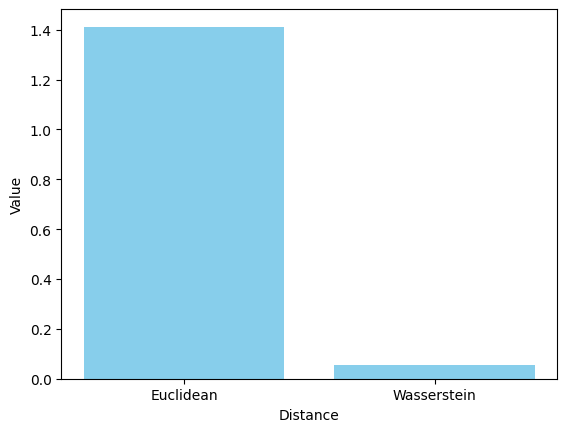

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Euclidean', 'Wasserstein']
values = [1.412005, 0.053996]

# Create the bar plot
plt.bar(categories, values, color='skyblue')

# Customize the plot
plt.xlabel('Distance')
plt.ylabel('Value')
# plt.title('Distance Plot')
# plt.grid(axis='y', linestyle='--')

# Add labels on top of the bars
# for index, value in enumerate(values):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

# plt.bar(x,y)


# Show the plot
plt.show()

In [ ]:


# Example text pairs
text_pairs = [
    ("The quick brown fox jumps over the lazy dog.", "A swift auburn fox leaps above a sleepy canine."),
    ("Apples and oranges are fruits.", "The Eiffel Tower is in Paris."),
]

for idx, (text1, text2) in enumerate(text_pairs):
    print(f"\n--- Pair {idx+1} ---")
    print("Text 1:", text1)
    print("Text 2:", text2)

    # Get embeddings and normalize
    emb1 = normalize_embedding(model.encode(text1))
    emb2 = normalize_embedding(model.encode(text2))

    # Euclidean distance (now in [0, 2])
    emb_distance = euclidean_distances([emb1], [emb2])[0][0]

    # Topological distance (Wasserstein on H0)
    topo_distance = wasserstein_distance_from_embeddings(emb1, emb2)

    print(f"Normalized Euclidean Distance: {emb_distance:.4f}")
    print(f"Topological Distance (Wasserstein on H0): {topo_distance:.4f}")


--- Pair 1 ---
Text 1: The quick brown fox jumps over the lazy dog.
Text 2: A swift auburn fox leaps above a sleepy canine.
Normalized Euclidean Distance: 0.7692
Topological Distance (Wasserstein on H0): 0.0322

--- Pair 2 ---
Text 1: Apples and oranges are fruits.
Text 2: The Eiffel Tower is in Paris.
Normalized Euclidean Distance: 1.4753
Topological Distance (Wasserstein on H0): 0.0674
